In [198]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from functools import partial
from tqdm import tqdm

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/lane/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#### Load problem specific starter code

In [2]:
cd 'cs228/pa1'

/home/lane/ssd/code/ipython-notebooks/classes/cs228/pa1


In [3]:
ls

pa1.py  __pycache__/  q6.mat  q7.mat  trained_mnist_model


In [4]:
import pa1

### Load model

In [5]:
model = pa1.load_model('doesnt matter')

In [8]:
model.keys()

['prior_z1', 'prior_z2', 'cond_likelihood']

## Question 4

#### Figure out how to draw samples from z's

In [38]:
# check sampling
samples = collections.defaultdict(int)
ntrials = 10000
for t in range(ntrials):
    random_num = np.random.rand()
    cumulative_pdf = np.cumsum([model['prior_z1'][k] for k in sorted(model['prior_z1'].keys())])
    which_val = np.argmin(abs(random_num - cumulative_pdf))
    which_z1 = [k for k in sorted(model['prior_z1'].keys())][which_val]
    samples[which_z1] += 1
    
for k in samples.keys():
    samples[k] /= float(ntrials)

In [40]:
for k in sorted(samples.keys()):
    print('Numerical: %0.4f vs %0.4f actual for key %s' %(samples[k], model['prior_z1'][k], k))

Numerical: 0.0023 vs 0.0011 actual for key -3.0
Numerical: 0.0035 vs 0.0023 actual for key -2.75
Numerical: 0.0062 vs 0.0044 actual for key -2.5
Numerical: 0.0092 vs 0.0079 actual for key -2.25
Numerical: 0.0155 vs 0.0135 actual for key -2.0
Numerical: 0.0273 vs 0.0216 actual for key -1.75
Numerical: 0.0383 vs 0.0324 actual for key -1.5
Numerical: 0.0518 vs 0.0457 actual for key -1.25
Numerical: 0.0667 vs 0.0606 actual for key -1.0
Numerical: 0.0814 vs 0.0754 actual for key -0.75
Numerical: 0.0906 vs 0.0882 actual for key -0.5
Numerical: 0.1012 vs 0.0968 actual for key -0.25
Numerical: 0.1026 vs 0.0999 actual for key 0.0
Numerical: 0.0920 vs 0.0968 actual for key 0.25
Numerical: 0.0798 vs 0.0882 actual for key 0.5
Numerical: 0.0696 vs 0.0754 actual for key 0.75
Numerical: 0.0540 vs 0.0606 actual for key 1.0
Numerical: 0.0411 vs 0.0457 actual for key 1.25
Numerical: 0.0278 vs 0.0324 actual for key 1.5
Numerical: 0.0166 vs 0.0216 actual for key 1.75
Numerical: 0.0120 vs 0.0135 actual for

## Sample both z's

In [45]:
z_vals = []
for z in ['prior_z1', 'prior_z2']:
    random_num = np.random.rand()
    cumulative_pdf = np.cumsum([model[z][k] for k in sorted(model[z].keys())])
    which_val = np.argmin(abs(random_num - cumulative_pdf))
    which_z = [k for k in sorted(model[z].keys())][which_val]
    z_vals.append(which_z)

In [46]:
z_vals

[0.75, -1.0]

## Sample from x's

In [110]:
x_probs = model['cond_likelihood'][tuple(z_vals)]

(-0.5, 27.5, 27.5, -0.5)

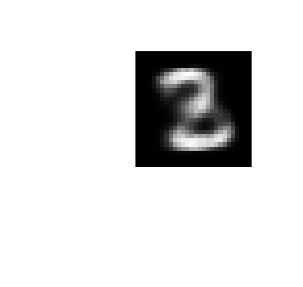

In [111]:
fig = plt.gcf()
fig.set_size_inches((.5,.5))
plt.imshow(x_probs.reshape(28, 28))
plt.axis('off')

In [124]:
def sample():
    z_vals = []
    for z in ['prior_z1', 'prior_z2']:
        random_num = np.random.rand()
        cumulative_pdf = np.cumsum([model[z][k] for k in sorted(model[z].keys())])
        which_val = np.argmin(abs(random_num - cumulative_pdf))
        which_z = [k for k in sorted(model[z].keys())][which_val]
        z_vals.append(which_z)
        
    x_probs = model['cond_likelihood'][tuple(z_vals)]
    x_sample = np.where(x_probs >= np.random.rand(x_probs.shape[1]), 1, 0)
    
    return x_sample.reshape(28,28)

In [125]:
x = sample()

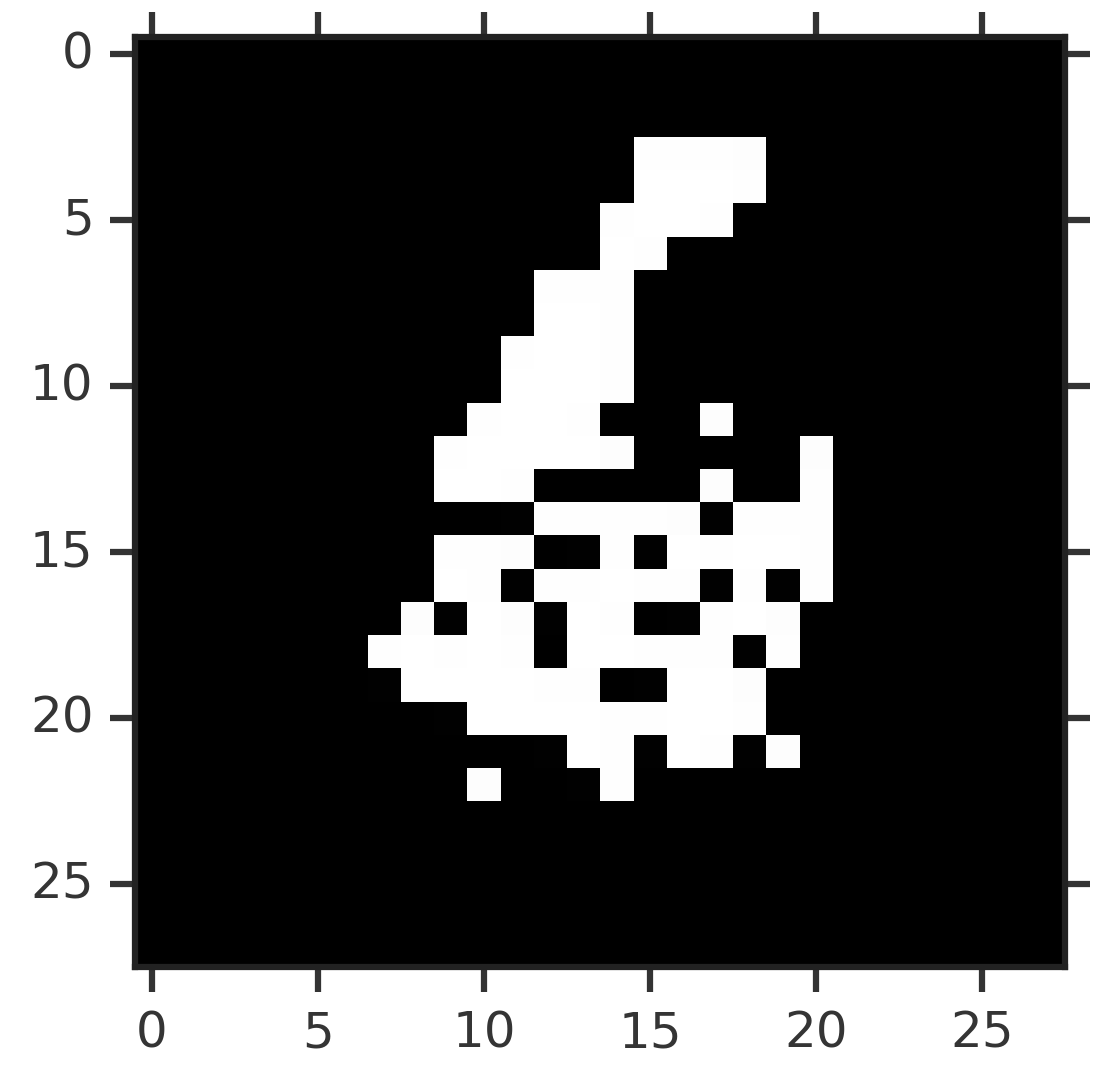

In [126]:
plt.imshow(x)

(-0.5, 27.5, 27.5, -0.5)

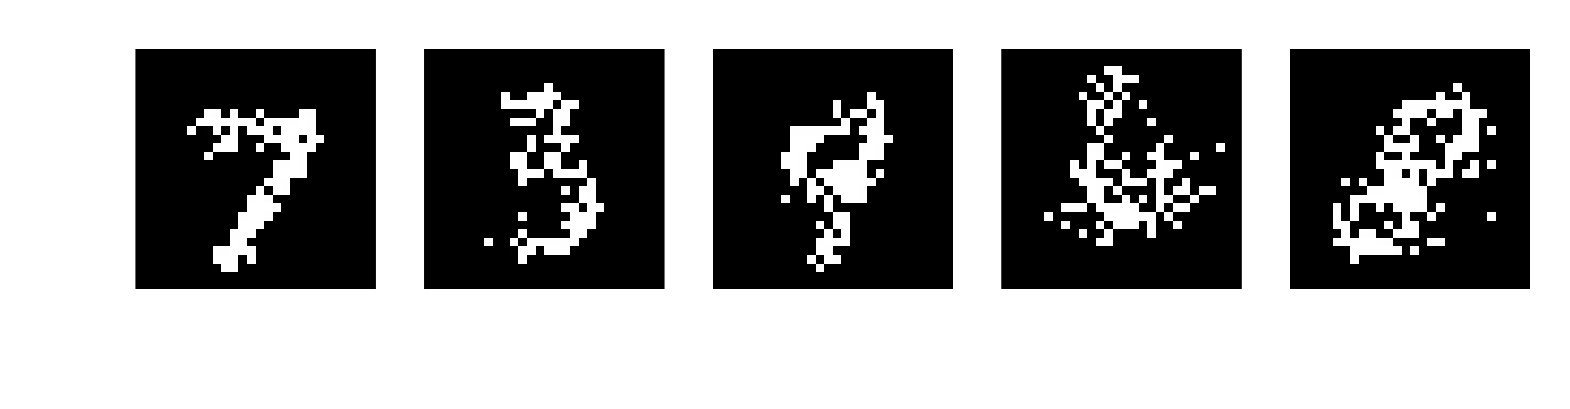

In [134]:
plt.subplot(1,5,1)
x = sample()
plt.imshow(x)
plt.axis('off')

plt.subplot(1,5,2)
x = sample()
plt.imshow(x)
plt.axis('off')

plt.subplot(1,5,3)
x = sample()
plt.imshow(x)
plt.axis('off')

plt.subplot(1,5,4)
x = sample()
plt.imshow(x)
plt.axis('off')

plt.subplot(1,5,5)
x = sample()
plt.imshow(x)
plt.axis('off')

## Question 5

In [128]:
def sample_given_z(z1, z2):
    # the conditional expectation is 1*p + 0*(1 - p) = p
    # aka, the conditional expectation = conditional likelihood
    
    z_vals = [z1, z2]
    x_sample = model['cond_likelihood'][tuple(z_vals)]
    
    return x_sample.reshape(28,28)

In [129]:
nzs = len(model['prior_z1'].keys())
grid = np.zeros((nzs*28, nzs*28))

# The flipping is to prepare grid for being shown in imshow, 
# where the origin is top left by default
for j,z1 in enumerate(sorted(model['prior_z1'].keys())):
    for i,z2 in enumerate(reversed(sorted(model['prior_z2'].keys()))):
        x = sample_given_z(z1, z2)
        grid[(i*28):((i+1)*28), (j*28):((j+1)*28)] = x

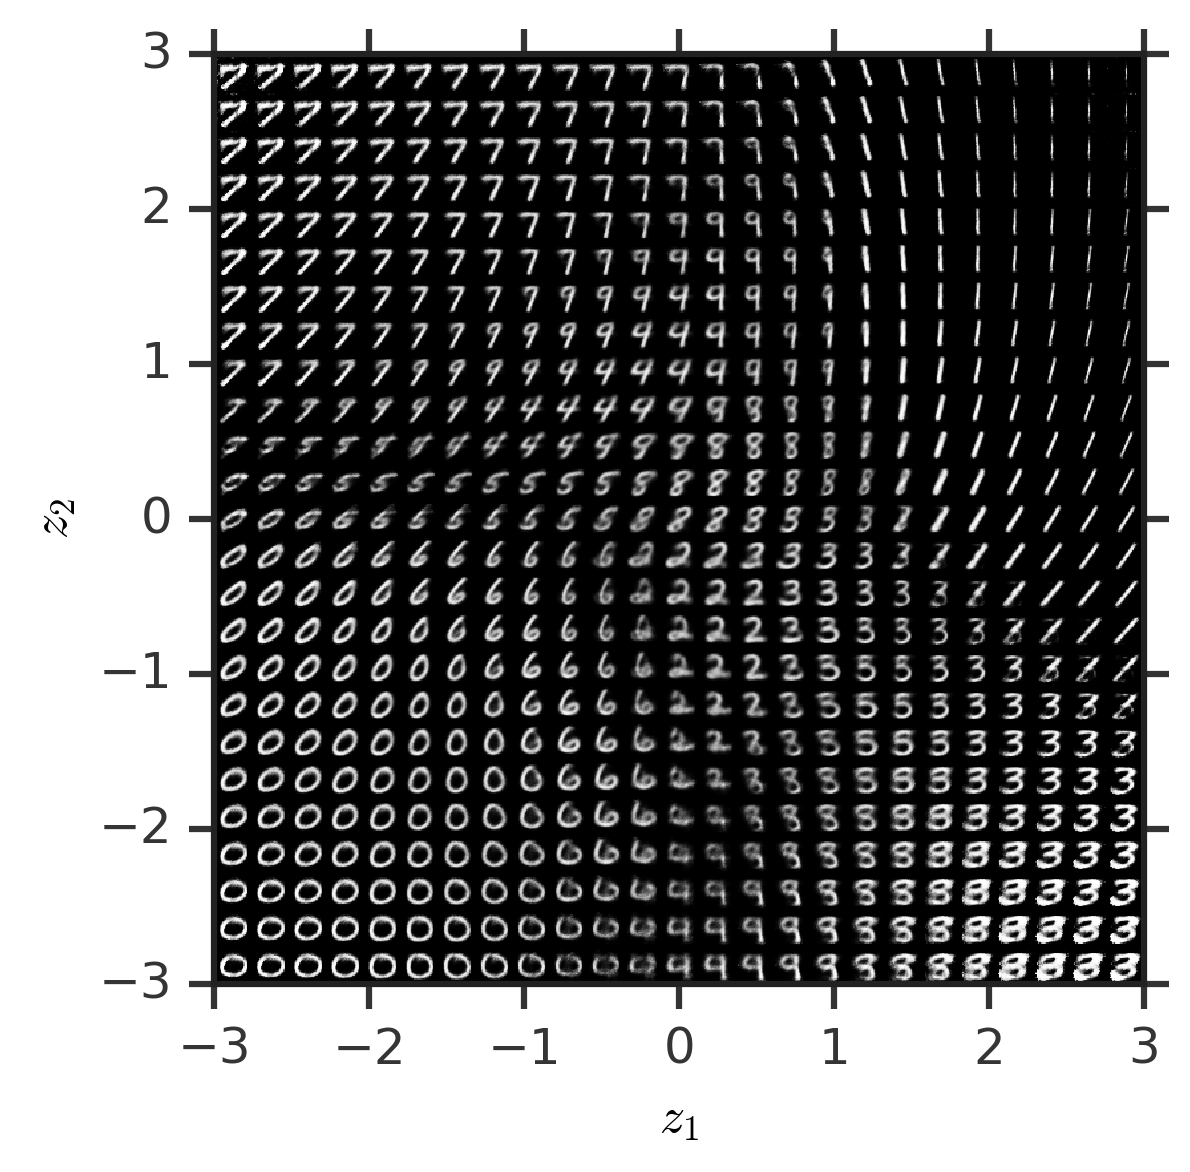

In [130]:
plt.imshow(grid, extent=([-3,3,-3,3]))
# plt.axis('off')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

## Question 6

In [93]:
from scipy.io import loadmat

In [94]:
mat = loadmat('q6.mat')
val_data = mat['val_x']
test_data = mat['test_x']

In [95]:
val_data.shape

(10000, 784)

In [96]:
test_data.shape

(20000, 784)

Compute the average marginal log-likelihood and the std

In [219]:
validation_log_likelihoods = []
for x_i in tqdm(val_data):
    prob = 0.0
    for z1 in model['prior_z1'].keys():
        for z2 in model['prior_z2'].keys():
            for i, pixel in enumerate(x_i):
                # p(z_1)*p(z_2)*(p(x_i) | z_1, z_2)
                xi_likelihood = 1
                if pixel:
                    xi_likelihood *= model['cond_likelihood'][(z1,z2)][0,i]
                else:
                    xi_likelihood *= (1 - model['cond_likelihood'][(z1,z2)][0,i])
                    
                prob += model['prior_z1'][z1] * model['prior_z2'][z2] * xi_likelihood
                
    validation_log_likelihoods.append(prob)

  2%|▏         | 224/10000 [06:54<5:04:01,  1.87s/it]

KeyboardInterrupt: 

In [218]:
np.log(prob)

1.9723732745735791

In [215]:
xi_likelihood

0.00077660445822402835

In [214]:
prob

7.1877146826912721

In [241]:
validation_likelihoods = np.zeros((val_data.shape[0],))
xi_likelihoods = {}

for z1 in tqdm(model['prior_z1'].keys()):
    for z2 in model['prior_z2'].keys():
        val_cond_likelihoods = np.zeros_like(val_data)
        for i in range(val_data.shape[1]):
            val_cond_likelihoods[:,i] += model['cond_likelihood'][(z1,z2)][0,i] * val_data[:,i]
            val_cond_likelihoods[:,i] += (1 - model['cond_likelihood'][(z1,z2)][0,i]) * (1 - val_data[:,i])
        
        xi_likelihoods[(z1,z2)] = model['prior_z1'][z1] * model['prior_z2'][z2] * np.prod(val_cond_likelihoods, axis=1)
        validation_likelihoods += xi_likelihoods[(z1,z2)]

In [245]:
log_probs = np.log(np.array(validation_likelihoods))

In [246]:
log_probs

array([-140.45268372, -119.09508625, -180.69783372, ..., -186.98144146,
       -120.84055056, -306.79511652])

In [250]:
mean_log_probs = np.mean(log_probs)
mean_log_probs

-138.67476852673386

In [251]:
std_log_probs = np.std(log_probs)
std_log_probs

45.451787544995867

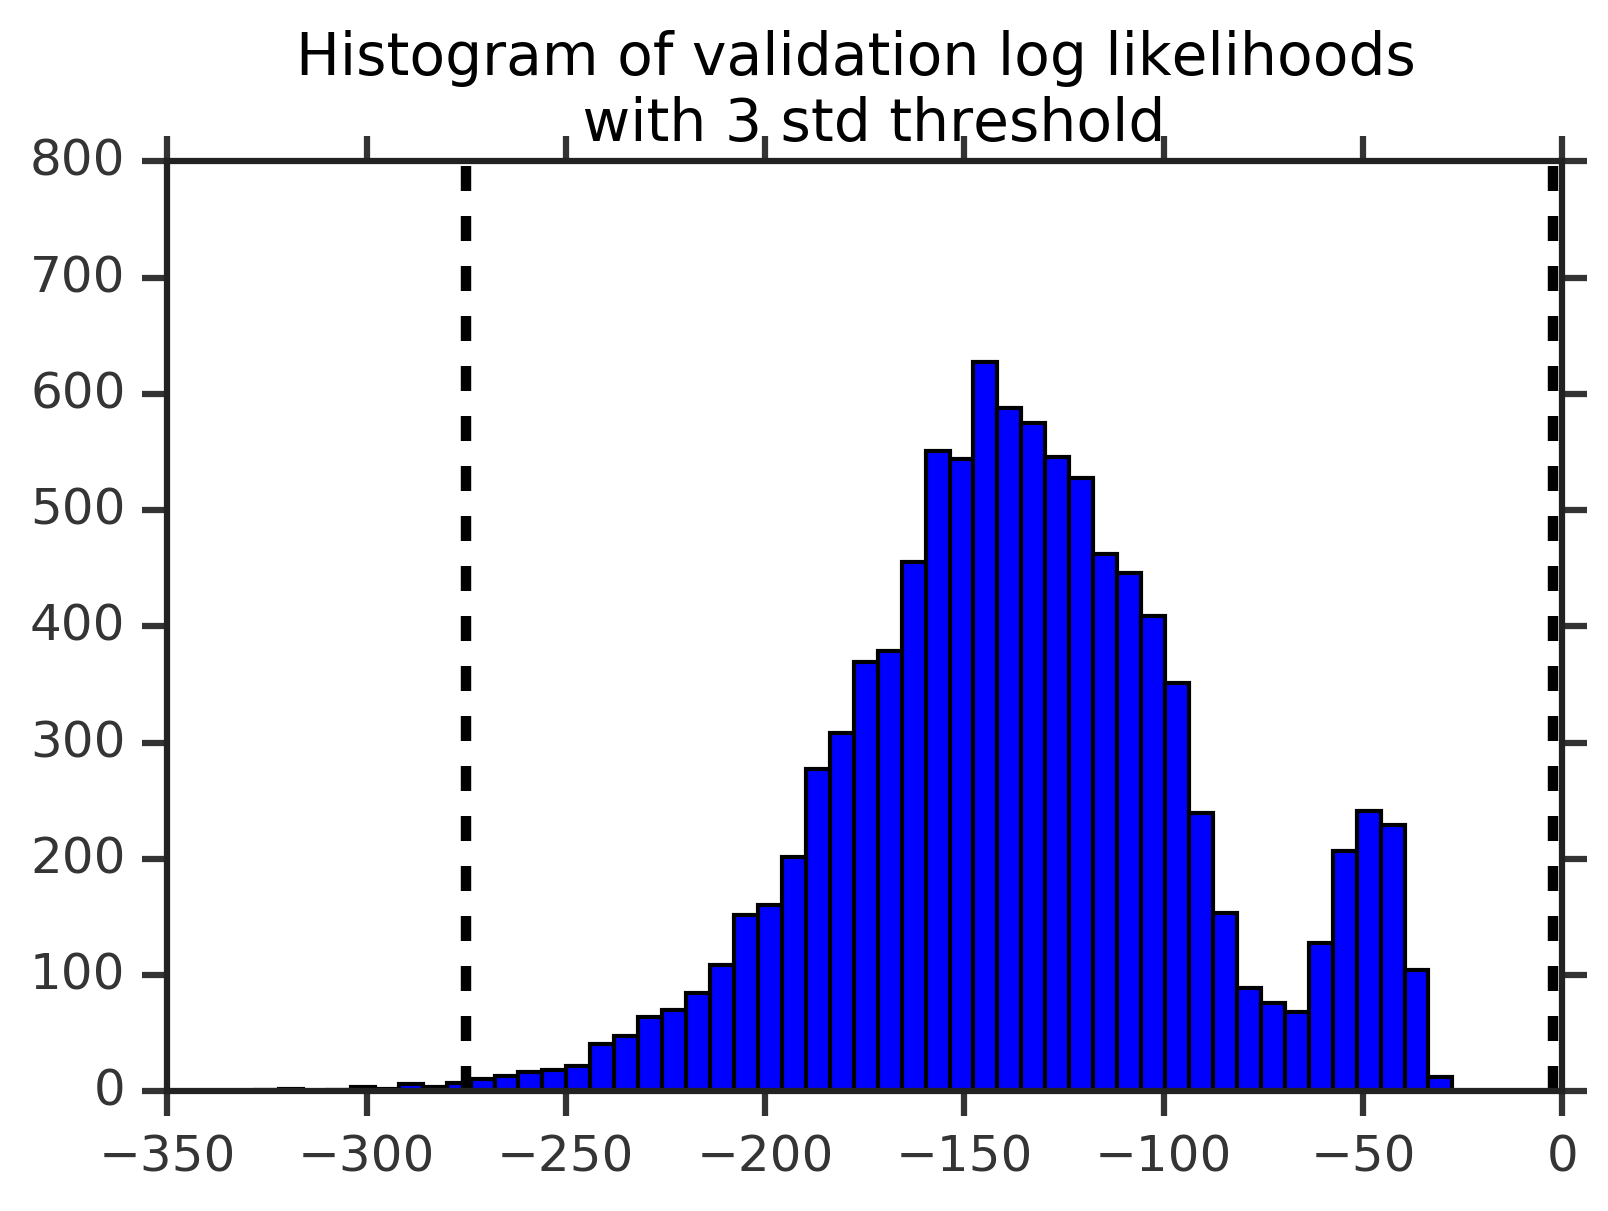

In [252]:
count, bins = np.histogram(log_probs, bins=50)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2, count, width=bin_width)

# plot 3 std threshold
plt.vlines(mean_log_probs-3*std_log_probs, 0, 800, linestyle='--')
plt.vlines(mean_log_probs+3*std_log_probs, 0, 800, linestyle='--')
plt.title('Histogram of validation log likelihoods \n with 3 std threshold', fontsize=14)

Now classify real and fake test images based on a 3-std rule

In [ ]:
# test_log_likelihoods = []
# test_classification = []
# classified_logprobs = collections.defaultdict(list)
# for x_i in tqdm(test_data):
#     prob = 0.0
#     for z1 in model['prior_z1'].keys():
#         for z2 in model['prior_z2'].keys():
#             for i, pixel in enumerate(x_i):
#                 # p(z_1)*p(z_2)*(p(x_i) | z_1, z_2)
#                 xi_likelihood = 1
#                 if pixel:
#                     xi_likelihood *= model['cond_likelihood'][(z1,z2)][0,i]
#                 else:
#                     xi_likelihood *= (1 - model['cond_likelihood'][(z1,z2)][0,i])
                    
#                 prob += model['prior_z1'][z1] * model['prior_z2'][z2] * xi_likelihood
                    
#             log_prob = np.log(prob)
#     test_log_likelihoods.append(log_prob)
#     if abs(log_prob - mean_log_probs) >= 3*std_log_probs:
#         test_classification.append(0)
#         classified_logprobs['fake'].append(log_prob)
#     else:
#         test_classification.append(1)
#         classified_logprobs['real'].append(log_prob)

In [326]:
# log-sum-exp trick; xi_log_likelihoods range from -4600 to -33
# exp(700) is largest value before overflow, so let's set
# a = -700 (we subtract a from x)
a = -700

test_likelihoods = np.zeros((test_data.shape[0],))
xi_log_likelihoods = {}

for z1 in tqdm(model['prior_z1'].keys()):
    for z2 in model['prior_z2'].keys():
        test_cond_likelihoods = np.zeros_like(test_data)
        for i in range(test_data.shape[1]):
            test_cond_likelihoods[:,i] += model['cond_likelihood'][(z1,z2)][0,i] * test_data[:,i]
            test_cond_likelihoods[:,i] += (1 - model['cond_likelihood'][(z1,z2)][0,i]) * (1 - test_data[:,i])
        
#         xi_likelihoods[(z1,z2)] = model['prior_z1'][z1] * model['prior_z2'][z2] * np.prod(test_cond_likelihoods, axis=1)
        xi_log_likelihoods[(z1,z2)] = np.log(model['prior_z1'][z1]) \
                                        + np.log(model['prior_z2'][z2]) \
                                        + np.sum(np.log(test_cond_likelihoods), axis=1)

        test_likelihoods += np.exp(xi_log_likelihoods[(z1,z2)] - a)

In [327]:
test_logprobs = a + np.log(test_likelihoods)

In [328]:
np.min(test_logprobs)

-1109.8852927330074

In [329]:
np.max(test_likelihoods)

5.2422045128548106e+289

In [330]:
np.min(test_likelihoods)

9.7516735157982425e-179

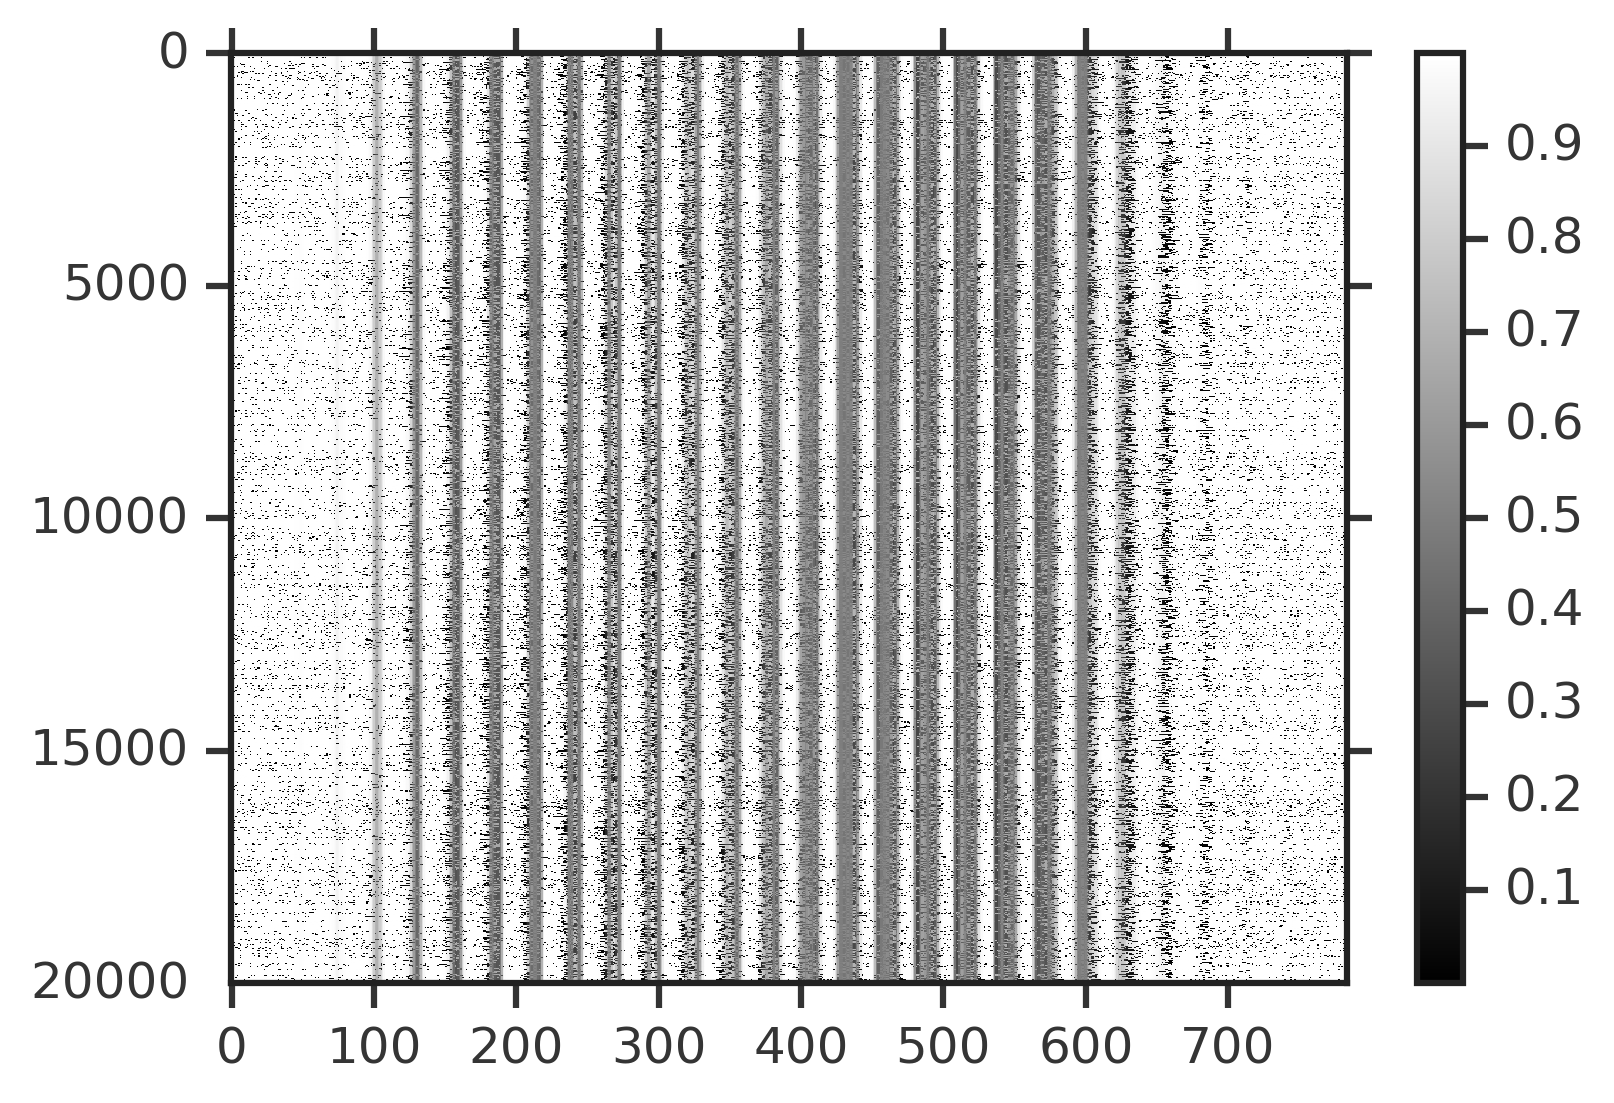

In [331]:
plt.imshow(test_cond_likelihoods, aspect='auto')
plt.colorbar()

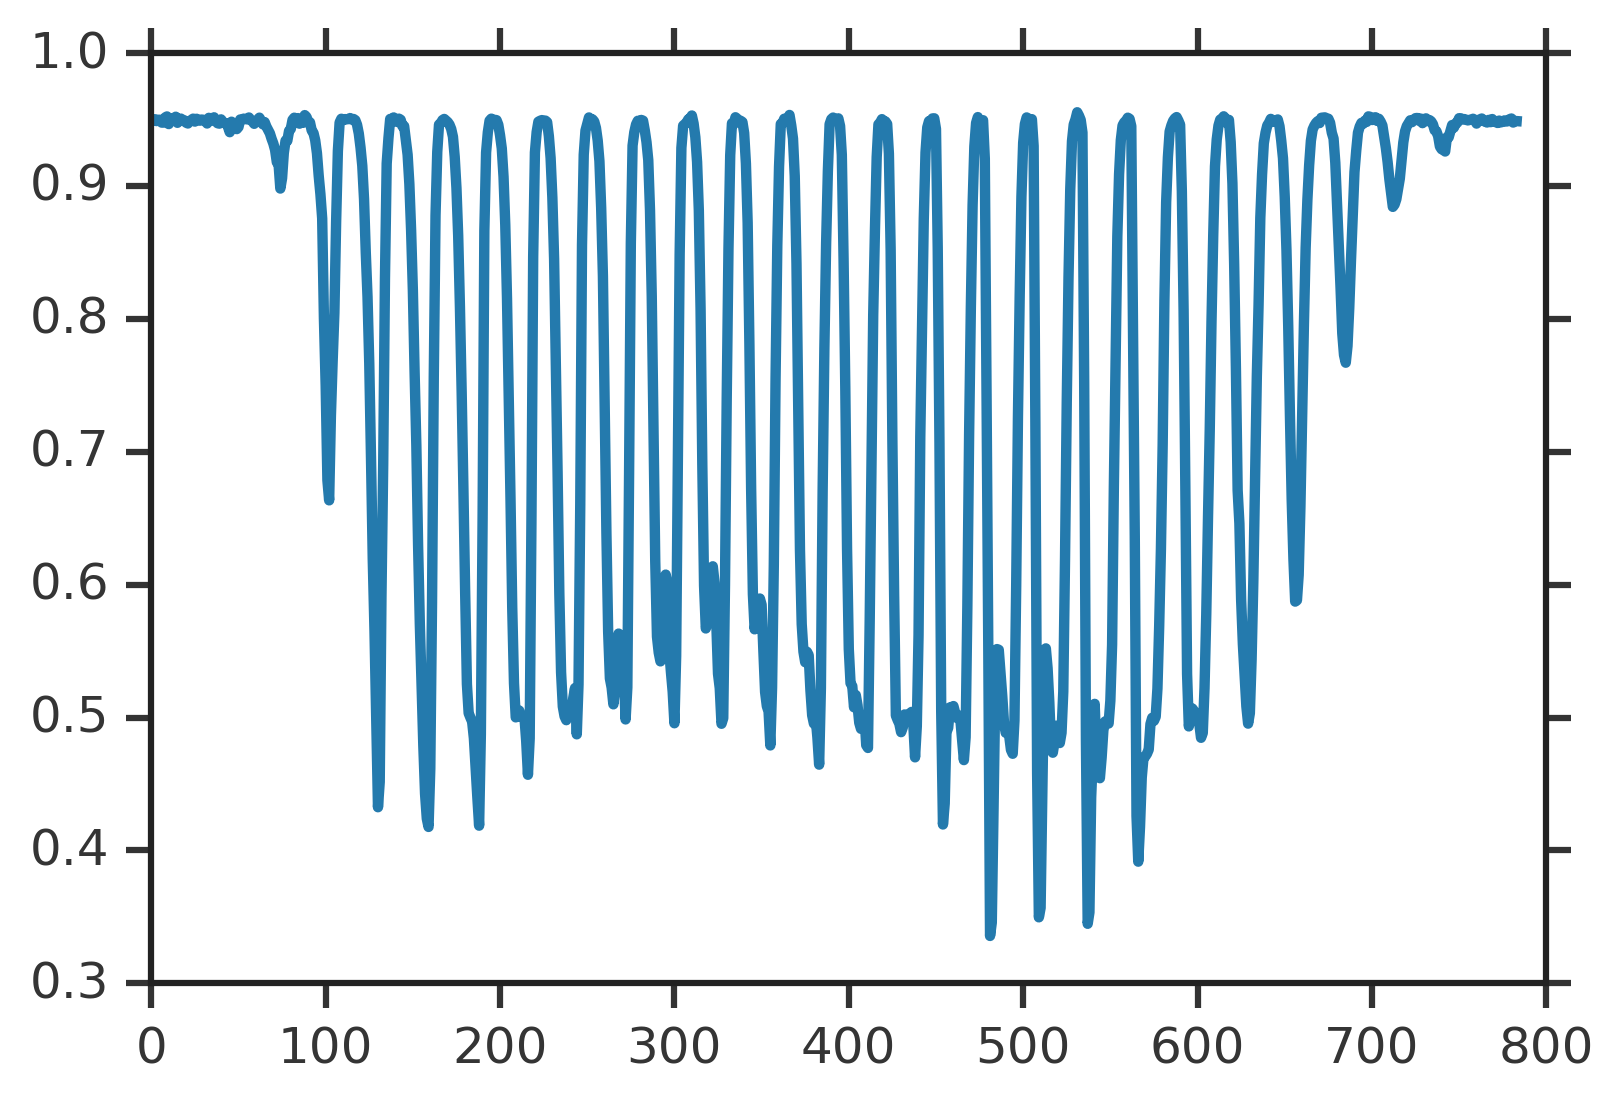

In [332]:
plt.plot(np.mean(test_cond_likelihoods, axis=0))

In [333]:
np.mean(test_logprobs)

-446.98560774712598

In [334]:
np.std(test_logprobs)

317.06314981827421

In [335]:
mean_log_probs

-138.67476852673386

In [336]:
classified_logprobs = collections.defaultdict(list)
for logprob in test_logprobs:
    if abs(logprob - mean_log_probs) >= 3*std_log_probs:
        classified_logprobs['fake'].append(logprob)
    else:
        classified_logprobs['real'].append(logprob)

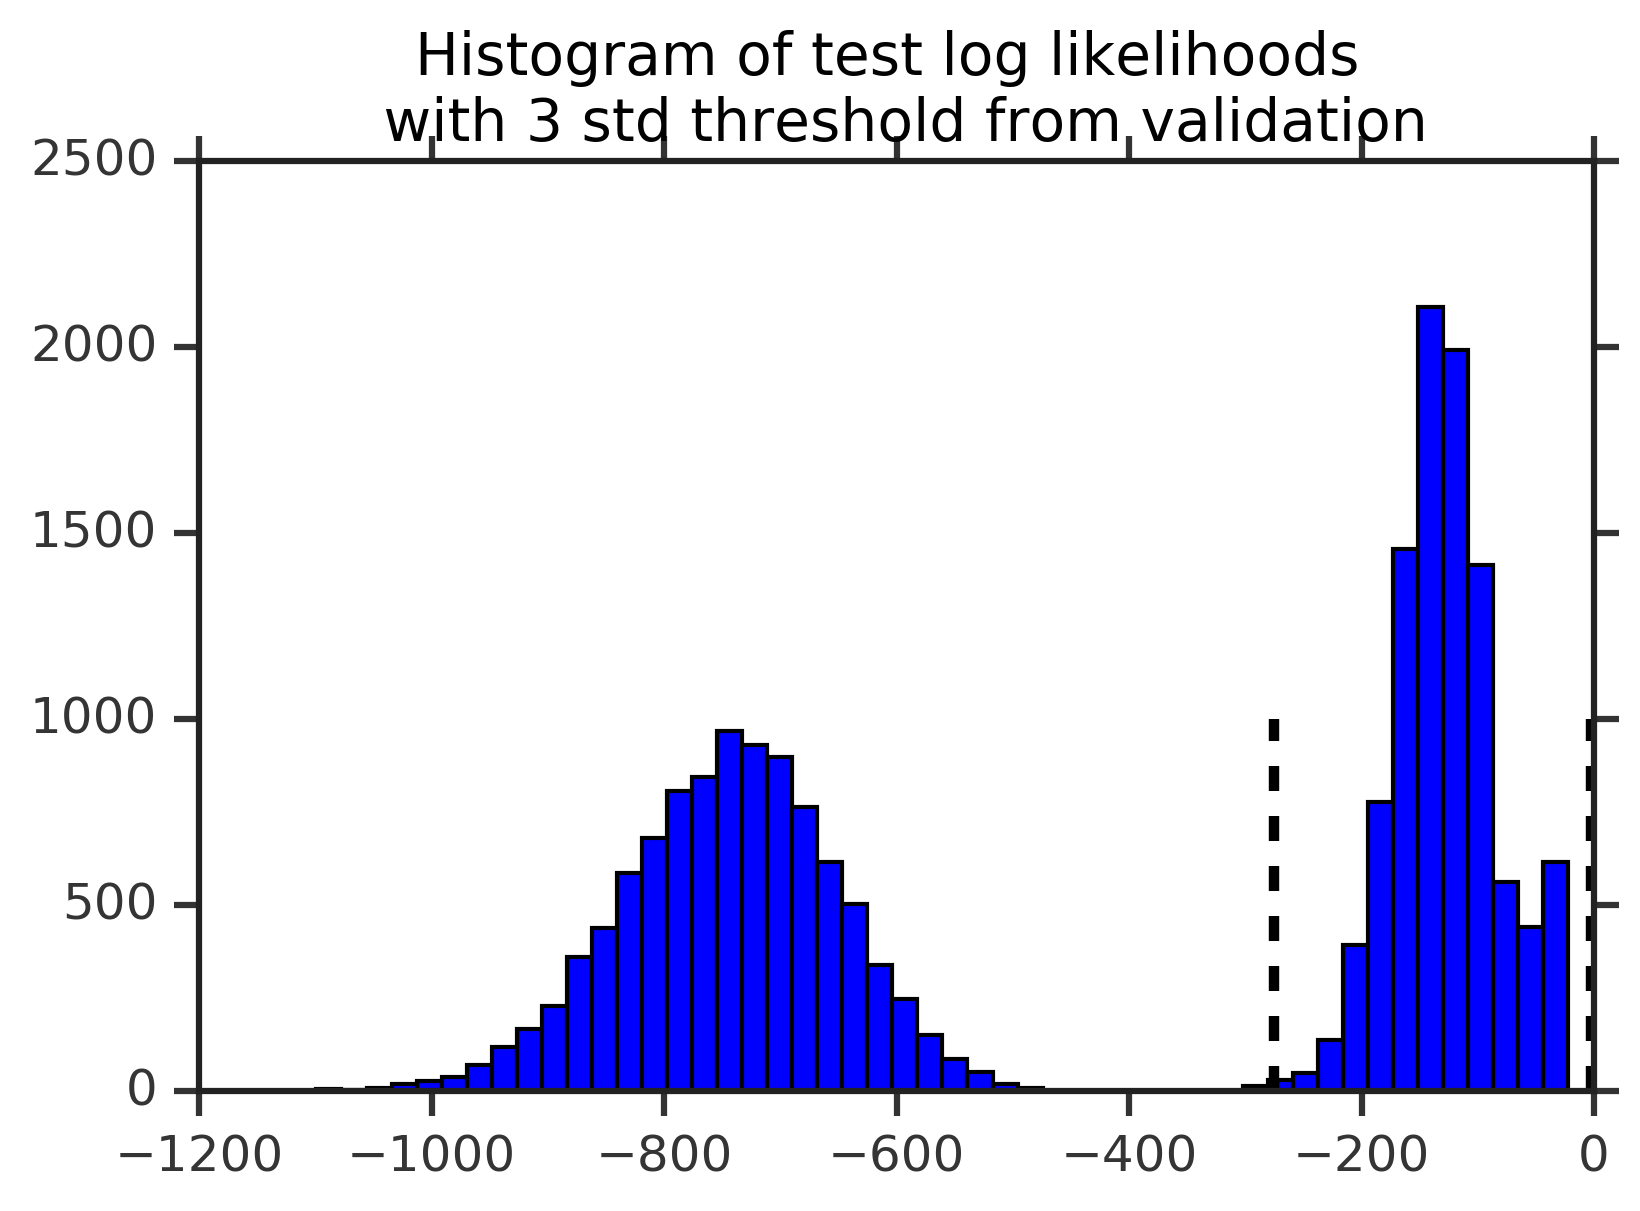

In [338]:
count, bins = np.histogram(test_logprobs, bins=50)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2, count, width=bin_width)

# plot 3 std threshold
plt.vlines(mean_log_probs-3*std_log_probs, 0, 1000, linestyle='--')
plt.vlines(mean_log_probs+3*std_log_probs, 0, 1000, linestyle='--')
plt.title('Histogram of test log likelihoods \n with 3 std threshold from validation', fontsize=14)

In [176]:
[p for i,p in enumerate(test_log_likelihoods) if p < 3*std_log_probs]

[]

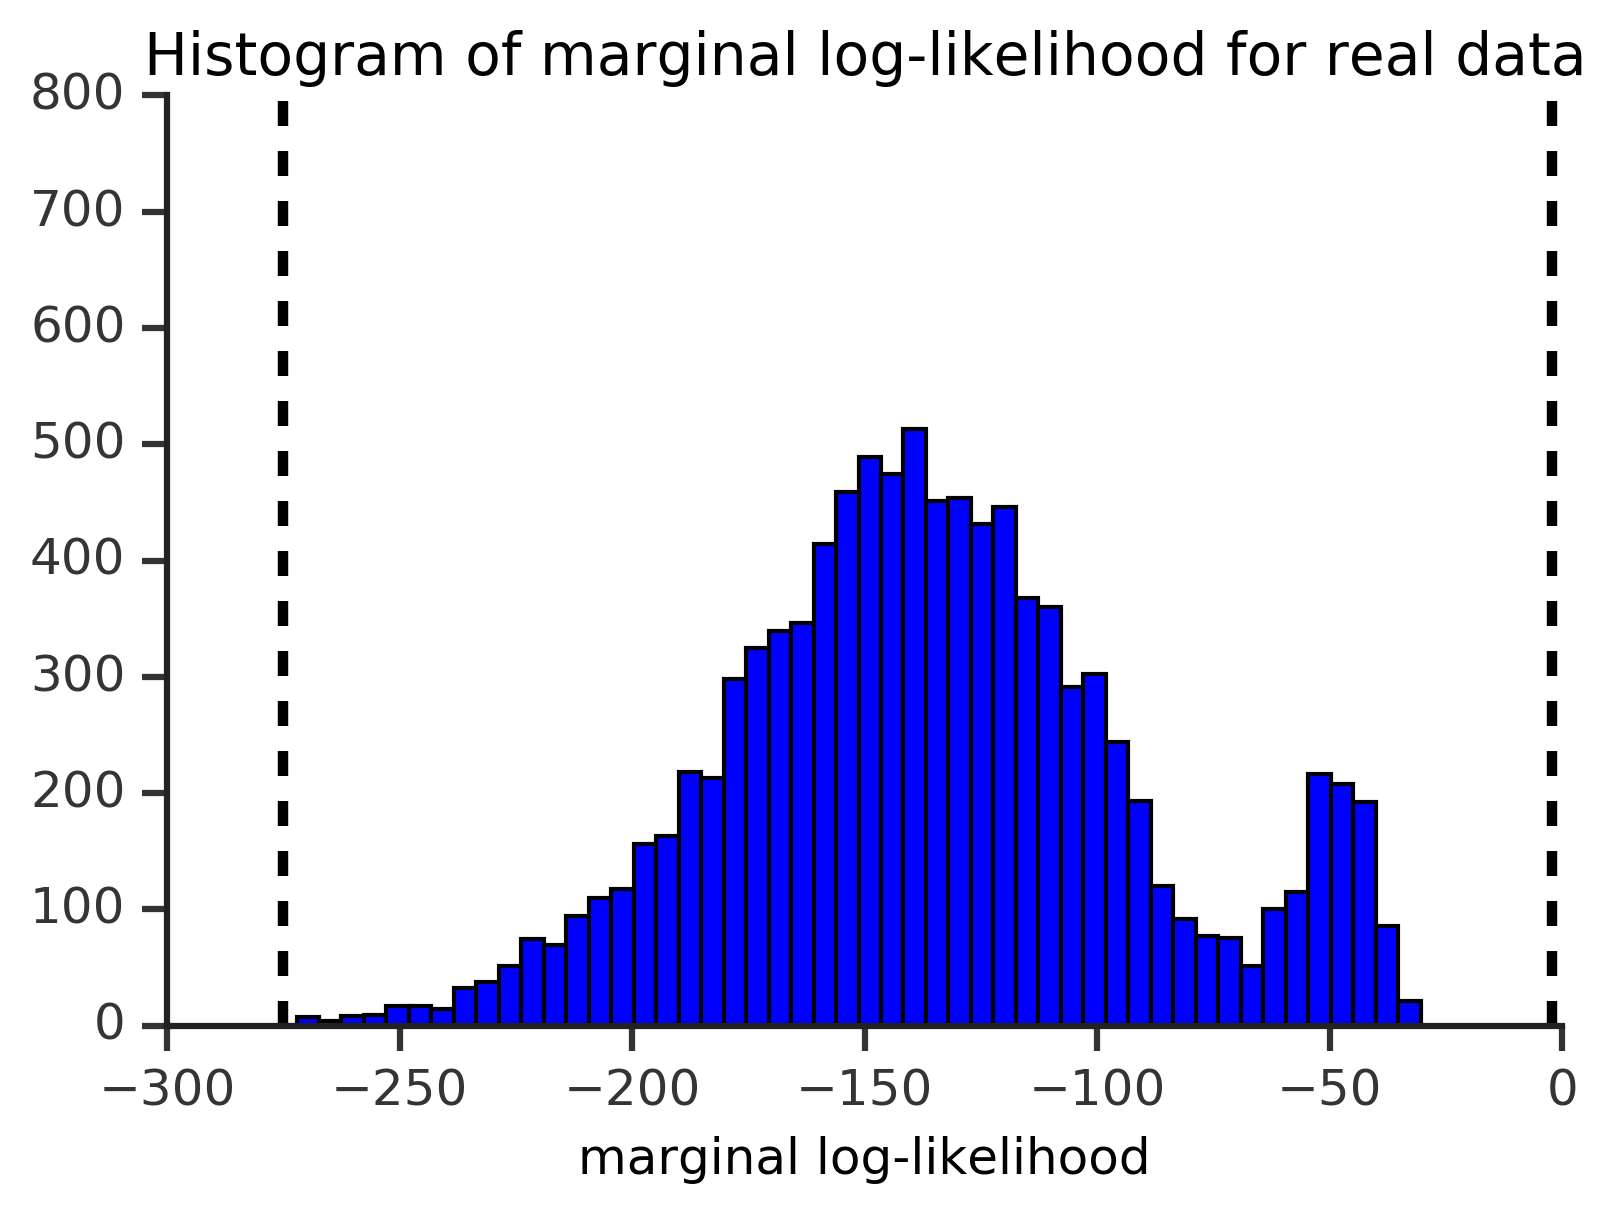

In [339]:
count, bins = np.histogram(classified_logprobs['real'], bins=50)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2, count, width=bin_width)

# plot 3 std threshold
plt.vlines(mean_log_probs-3*std_log_probs, 0, 800, linestyle='--')
plt.vlines(mean_log_probs+3*std_log_probs, 0, 800, linestyle='--')
plt.title('Histogram of marginal log-likelihood for real data', fontsize=14)
plt.xlabel('marginal log-likelihood')
ax1 = plt.gca()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

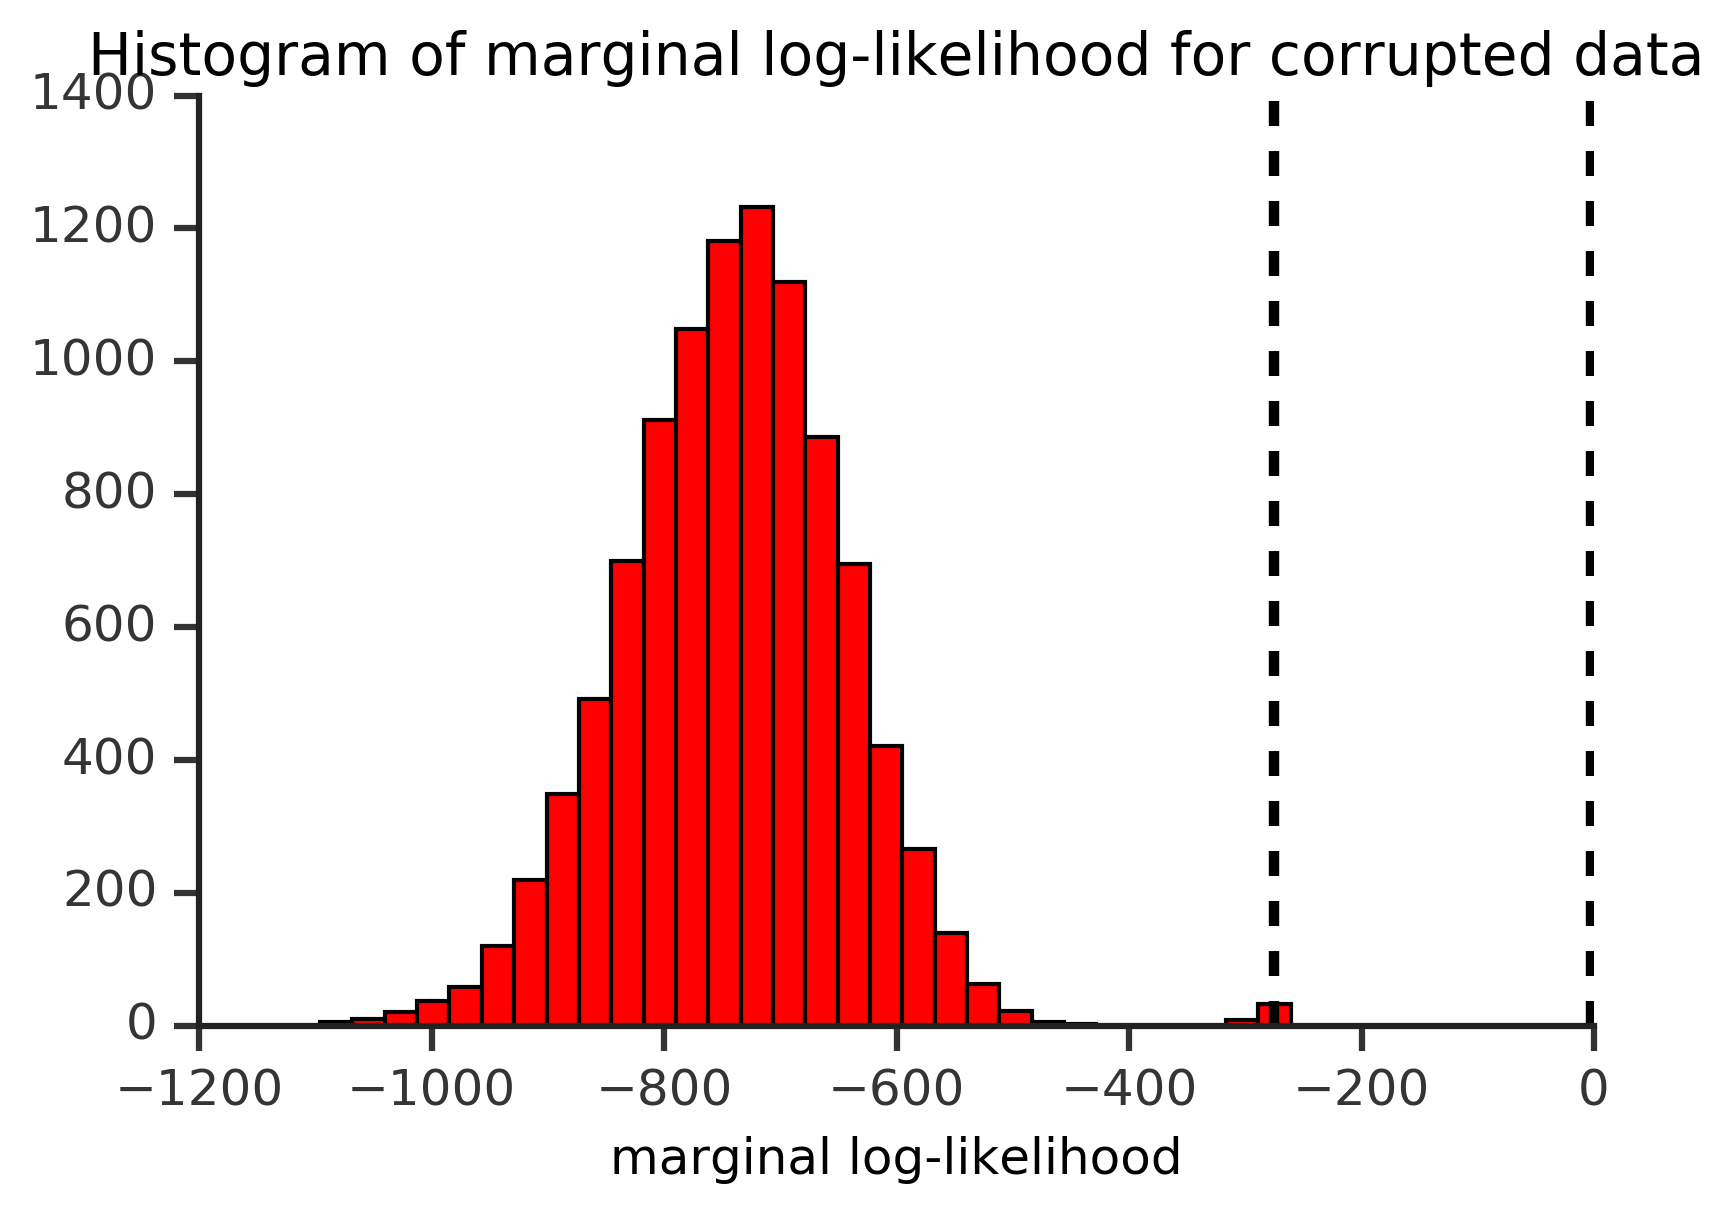

In [341]:
count, bins = np.histogram(classified_logprobs['fake'], bins=30)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2, count, width=bin_width, color='r')

# plot 3 std threshold
plt.vlines(mean_log_probs-3*std_log_probs, 0, 1400, linestyle='--')
plt.vlines(mean_log_probs+3*std_log_probs, 0, 1400, linestyle='--')
plt.title('Histogram of marginal log-likelihood for corrupted data', fontsize=14)
plt.xlabel('marginal log-likelihood')
ax1 = plt.gca()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Question 7

In [187]:
mat = loadmat('q7.mat')
y = mat['y']
x = mat['x']

In [188]:
y.shape

(1000, 1)

In [189]:
x.shape

(1000, 784)

In [382]:
a = -700
posteriors = {}
log_likelihoods = {}
prior_Ik = np.zeros((y.shape[0],))

# pre-compute p(z1, z2)
# prior_z1_z2 = {}
# for z1 in model['prior_z1'].keys():
#         for z2 in model['prior_z2'].keys():
#             prior_z1_z2[(z1, z2)] = model['prior_z1'][z1] * model['prior_z2'][z2]


for z1 in tqdm(model['prior_z1'].keys()):
    for z2 in model['prior_z2'].keys():
        test_cond_likelihoods = np.zeros_like(x)
        for i in range(x.shape[1]):
            test_cond_likelihoods[:,i] += model['cond_likelihood'][(z1,z2)][0,i] * x[:,i]
            test_cond_likelihoods[:,i] += (1 - model['cond_likelihood'][(z1,z2)][0,i]) * (1 - x[:,i])

        log_likelihoods[(z1,z2)] = np.sum(np.log(test_cond_likelihoods), axis=1)
        
        prior_Ik += np.exp(log_likelihoods[(z1,z2)] + np.log(model['prior_z1'][z1]) + np.log(model['prior_z2'][z2]) - a)
            
#         xi_likelihoods[(z1,z2)] = model['prior_z1'][z1] * model['prior_z2'][z2] * np.prod(test_cond_likelihoods, axis=1)
#         posteriors[(z1,z2)] = np.exp(np.log(model['prior_z1'][z1]) \
#                                         + np.log(model['prior_z2'][z2]) \
#                                         + np.sum(np.log(test_cond_likelihoods), axis=1) \
#                                         - np.log(prior_Ik))

log_prior_Ik = a + np.log(prior_Ik)

for z1 in tqdm(model['prior_z1'].keys()):
    for z2 in model['prior_z2'].keys():
        posteriors[(z1,z2)] = np.exp(log_likelihoods[(z1,z2)] \
                                + np.log(model['prior_z1'][z1]) \
                                + np.log(model['prior_z2'][z2]) \
                                - log_prior_Ik)

In [385]:
np.min([np.min(posteriors[k]) for k in posteriors.keys()])

0.0

In [386]:
np.max([np.max(posteriors[k]) for k in posteriors.keys()])

1.0000000000000284

### Compute conditional expectation

In [392]:
cond_expectation = np.zeros((2,y.shape[0]))
for img in range(y.shape[0]):
    for key in posteriors.keys():
        cond_expectation[:,img] += posteriors[key][img] * np.array(key)

In [393]:
colorscheme = {
    0: '#33cc33',
    1: '#33cccc',
    2: '#0066ff',
    3: '#cc33ff',
    4: '#ff0066',
    5: '#ff9900',
    6: '#ffff00',
    7: '#000000',
    8: '#ff99ff',
    9: '#ff9999'
}

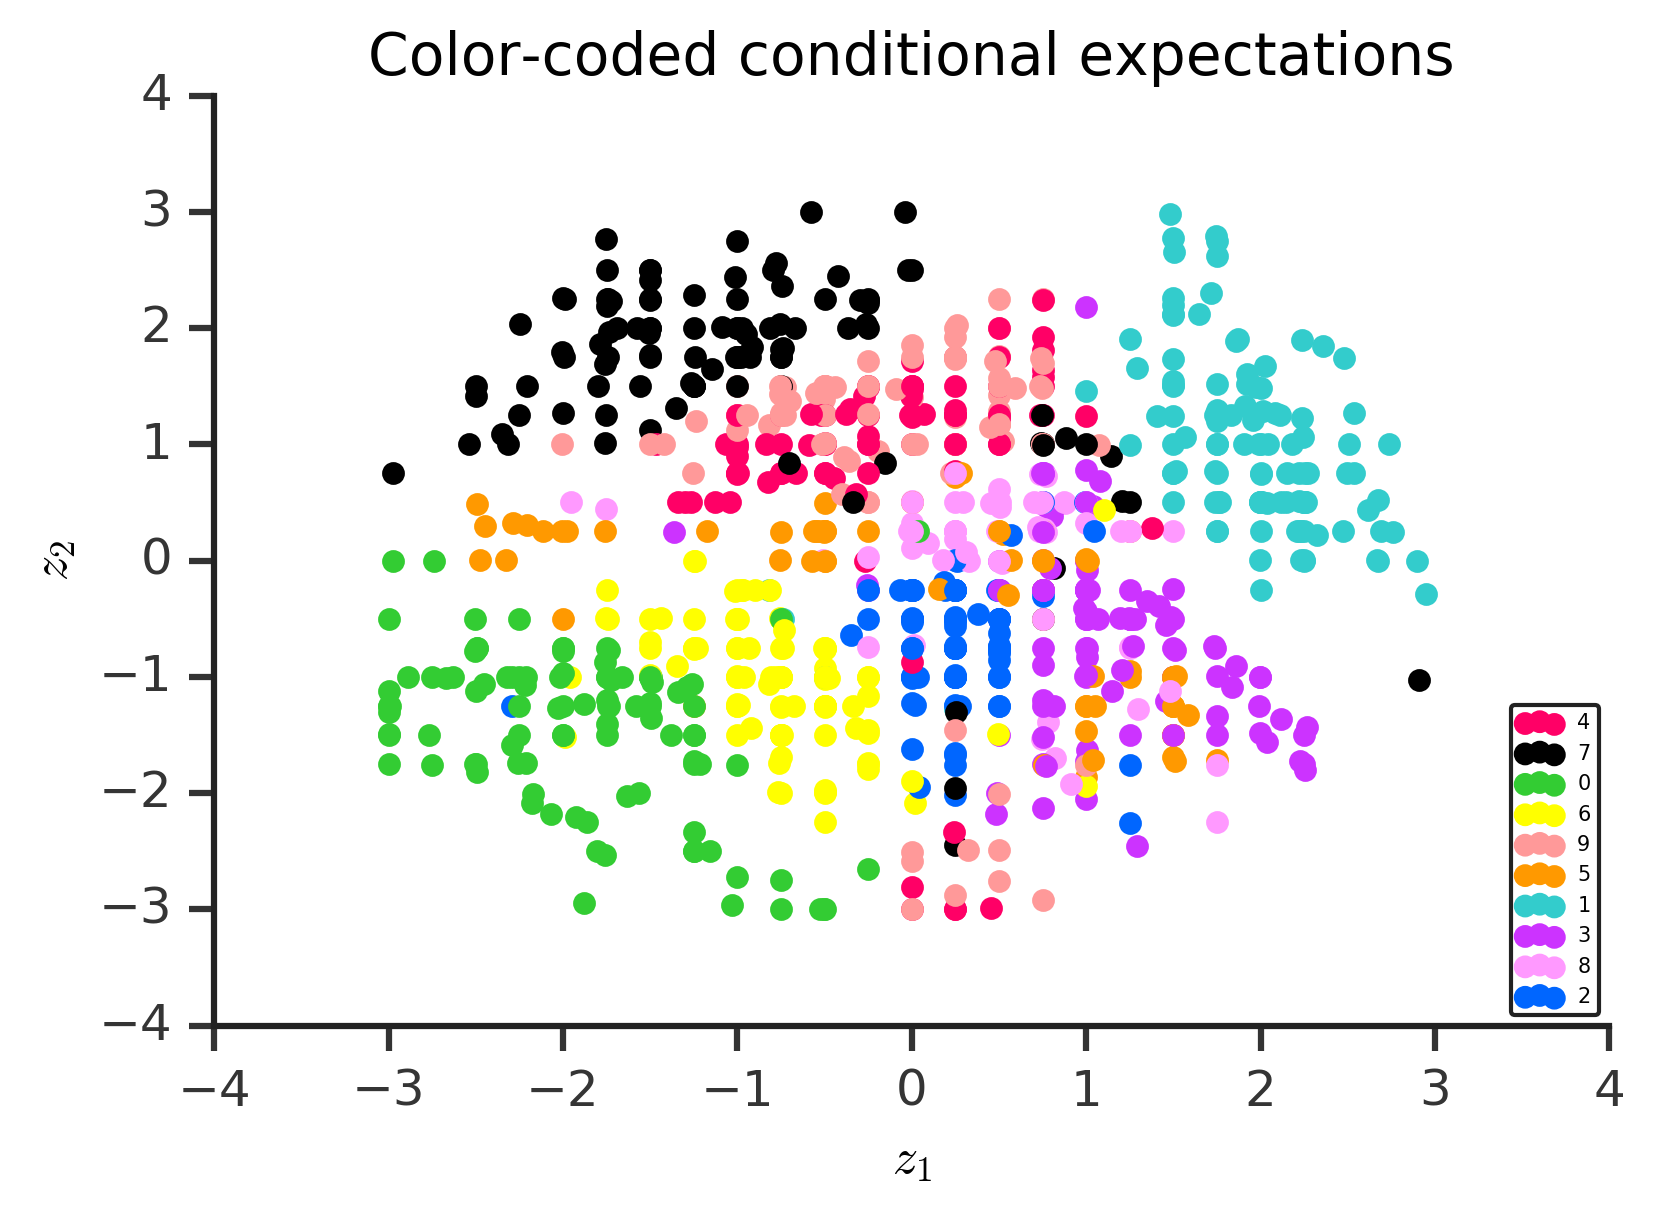

In [401]:
used_colors = collections.defaultdict(int)
for img in range(y.shape[0]):
    used_colors[y[img][0]] += 1
    if used_colors[y[img][0]] > 1:
        plt.scatter(cond_expectation[0,img], cond_expectation[1,img], color=colorscheme[y[img][0]])
    else:
        plt.scatter(cond_expectation[0,img], cond_expectation[1,img], color=colorscheme[y[img][0]], label=y[img][0])
plt.title('Color-coded conditional expectations', fontsize=14)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
ax1 = plt.gca()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower right', frameon=True, fontsize=5)

In [395]:
check = 0
for key in posteriors.keys():
    check += posteriors[key][img]

In [396]:
check

0.99999999999995826

yay!